# 0.Imports

In [1]:
from ruleclassifier import RuleClassifier
from utils import plot_confusion_matrix
import pandas as pd
import numpy as np

# 1. Data Loading

In [2]:
df = pd.read_csv('./data/pgm-dataset-v6-clean.csv')

In [3]:
df.head()

,teorTexto,setorDestino,tipoAviso,orgaoJulgador,assuntos,documentos,anexos,classeProcesso,qtd_sentenca,qtd_acordao,qtd_transito_julgado,novoSetorDestino,teorTexto_clean
0,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,APOIO FISCAL,Intimação,5ª VEFT de Natal,5952,Despacho;Petição;Intimação;Diligência;Penhora;...,0243943-10.2007.8.20.0001 Ext DA;Endereço da e...,1116,0,0,0,AF,a contato processo exequente munic...
1,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,APOIO FISCAL,Intimação,4ª VEFT de Natal,10536;5952,Certidão Trânsito em Julgado;Sentença;Petição ...,0865696-23.2018.8.20.5001 Ext DA;Rcda - extrat...,1116,1,0,1,AF,a processo acao execucao fi...
2,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,APOIO FISCAL,Intimação,4ª VEFT de Natal,5951,Decisão;Diligência;Mandado;Despacho;Certidão;D...,0508032-92.2006;0508032-92.2006 - EXT;0508032-...,1116,0,0,0,AF,o direito central avaliacao arrematacao ...
3,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,APOIO FISCAL,Intimação,6ª VEFT de Natal,10534;5952,Documento de Comprovação;Petição;Intimação;Dil...,Relatório da Dívida Otto novo;Petição-2;Relató...,1116,0,0,0,AF,a contato processo exequente munic...
4,PODER JUDICIÁRIO DO ESTADO DO RIO GRANDE DO NO...,APOIO FISCAL,Intimação,2ª VEFT de Natal,5951,Petição;Despacho;Petição;Decisão;Petição;Despa...,RELATÓRIO;ENDEREÇOS;0817107-68.2016.8.20.5001-...,1116,0,0,0,AF,tributaria processo execucao fiscal ...


In [4]:
df['teorTexto_clean'] = df['teorTexto_clean'].fillna('')

# 2. Rule Classifier

In [33]:
rule_clf = RuleClassifier()

## 2.1 - Registrando Regras

In [34]:
# REGRA 1:  SE tipoAviso = I E orgaoJulgador = 4ª VEFT N  E (teorTexto_clean CONTÉM "fazenda" OU teorTexto_clean CONTÉM "publica") ENTÃO setorDestino = AF
def rule1(row):
    return(row['tipoAviso'] == 'Intimação' and
           'VEFT' in row['orgaoJulgador'] and
           ('fazenda' in row['teorTexto_clean'] or 'publica' in row['teorTexto_clean']))

# REGRA 2: SE classeProcesso = 1116 E assuntos CONTÉM "10536" E "5952" ENTÃO setorDestino = AF
def rule2(row):
    return (row['classeProcesso'] == 1116 and
           '10536' in row['assuntos'] and '5952' in row['assuntos'] )

# REGRA 3: SE orgaoJulgador CONTÉM "JFP" (Juizado da Fazenda Pública) ENTÃO setorDestino = DCC
def rule3(row):
    return 'JFP' in row['orgaoJulgador']

# Kézia
# REGRA 4: SE orgaoJulgador = VEFT E classeProcesso = 1116 E (teorTexto_clean CONTÉM alvará E teorTexto_clean CONTÉM expe {de expedição, expedir, etc...}) ENTÃO setorDestino = NDD - AF
def rule4(row):
    return ('VEFT' in row['orgaoJulgador'] and
            row['classeProcesso'] == 1116 and
            ('alvara' in row['teorTexto_clean'] or 'expe' in row['teorTexto_clean']))

# REGRA 5: SE orgaoJulgador = VEFT E classeProcesso = 1116 E (teorTexto_clean CONTÉM alvará E teorTexto_clean CONTÉM expe {de expedição, expedir, etc...} E teorTexto_clean CONTÉM art 40) ENTÃO setorDestino = AF
def rule5(row):
    return ('VEFT' in row['orgaoJulgador'] and
            row['classeProcesso'] == 1116 and
            #('alvara' in row['teorTexto_clean'] or 'expe' in row['teorTexto_clean']) and
            'art 40' in row['teorTexto_clean'])


rule_clf.add_rule(rule1, 'AF')
rule_clf.add_rule(rule2, 'AF')
rule_clf.add_rule(rule3, 'DCC')
rule_clf.add_rule(rule4, 'NDD - AF')
rule_clf.add_rule(rule5, 'AF')

# 3. Classificando os dados

In [35]:
y_pred = rule_clf.classify_dataframe(df)

# 4. Avaliando

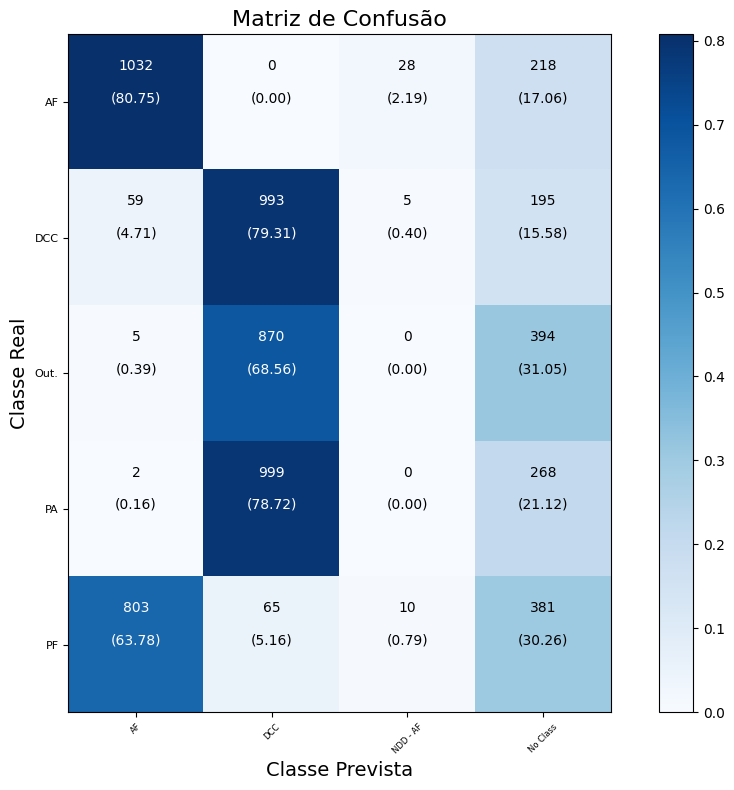

In [36]:
class_names = np.unique(df['novoSetorDestino'])

plot_confusion_matrix(y_true=df['novoSetorDestino'], y_pred=y_pred, class_names=class_names)

In [37]:
rule_clf.get_rule_counts()

{'rule_1': 1491, 'rule_2': 410, 'rule_3': 2927, 'rule_4': 43, 'rule_5': 0}

In [27]:
df_selecionado = pd.read_csv('./data/novos_DataFrames/df_selecionado.csv')

In [28]:
df_selecionado['setorDestino'].value_counts()

setorDestino
AF                               300
DCC                              300
PF                               300
PA                               300
PJud                             202
CA                                46
PS                                16
CJ                                15
Chefia Patrimonial                 9
Procuradoria do Meio Ambiente      6
AG                                 5
CMA                                1
Name: count, dtype: int64